In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data and clean

In [40]:
#https://www.kaggle.com/nathanlauga/nba-games/version/8?select=games.csv

In [2]:
df_nba_games = pd.read_csv('/home/dsc/repos/master-kschool/TFM/games.csv')
df_nba_games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25019,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25020,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25021,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25022,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [20]:
df_nba_games = df_nba_games.select_dtypes(include=np.number)

In [21]:
df_nba_games = df_nba_games.apply(lambda x: x.fillna(x.mean()),axis=0)

In [22]:
target = df_nba_games[['HOME_TEAM_WINS']]

In [23]:
data = df_nba_games[['FG_PCT_home', 'FG_PCT_away', 'FG3_PCT_home', 'FG3_PCT_away']]

# Visualization

In [24]:
import seaborn as sns

In [25]:
df_corr = df_nba_games.corr()
df_corr

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
GAME_ID,1.000000,-0.026778,-0.031991,0.096227,-0.026778,0.032788,0.018327,0.036182,-0.003966,-0.033687,-0.006796,-0.031991,0.002545,0.005403,0.033339,-0.002673,-0.044141,-0.025191,0.031098
HOME_TEAM_ID,-0.026778,1.000000,-0.046470,0.000090,1.000000,-0.024963,-0.006234,-0.007277,0.003973,-0.099580,-0.028500,-0.046470,-0.009400,0.022041,0.015426,0.015365,-0.070020,-0.029522,-0.021055
VISITOR_TEAM_ID,-0.031991,-0.046470,1.000000,0.001328,-0.046470,-0.004295,0.033856,0.004875,0.017116,0.015929,-0.007327,1.000000,-0.034266,-0.024115,-0.016243,-0.022183,-0.011684,-0.012371,0.030147
SEASON,0.096227,0.000090,0.001328,1.000000,0.000090,0.331887,0.037262,0.060855,0.027372,0.179536,0.160434,0.001328,0.363581,0.068175,0.063021,0.020800,0.239630,0.194169,-0.024923
TEAM_ID_home,-0.026778,1.000000,-0.046470,0.000090,1.000000,-0.024963,-0.006234,-0.007277,0.003973,-0.099580,-0.028500,-0.046470,-0.009400,0.022041,0.015426,0.015365,-0.070020,-0.029522,-0.021055
PTS_home,0.032788,-0.024963,-0.004295,0.331887,-0.024963,1.000000,0.661914,0.182789,0.424088,0.597182,0.160671,-0.004295,0.482191,0.128406,0.070174,0.058298,0.203546,-0.141043,0.400475
FG_PCT_home,0.018327,-0.006234,0.033856,0.037262,-0.006234,0.661914,1.000000,0.017738,0.448307,0.548760,-0.191130,0.033856,0.115450,0.041238,0.031214,0.015752,0.013490,-0.465233,0.431291
FT_PCT_home,0.036182,-0.007277,0.004875,0.060855,-0.007277,0.182789,0.017738,1.000000,0.027616,0.016702,-0.053931,0.004875,0.074022,0.046621,0.035518,0.021804,0.028945,-0.114886,0.091686
FG3_PCT_home,-0.003966,0.003973,0.017116,0.027372,0.003973,0.424088,0.448307,0.027616,1.000000,0.352734,-0.088833,0.017116,0.049621,0.010071,0.015713,-0.000405,-0.000583,-0.200306,0.298194
AST_home,-0.033687,-0.099580,0.015929,0.179536,-0.099580,0.597182,0.548760,0.016702,0.352734,1.000000,0.062335,0.015929,0.178877,0.005762,0.026437,-0.006848,0.140302,-0.110252,0.303876


<AxesSubplot:>

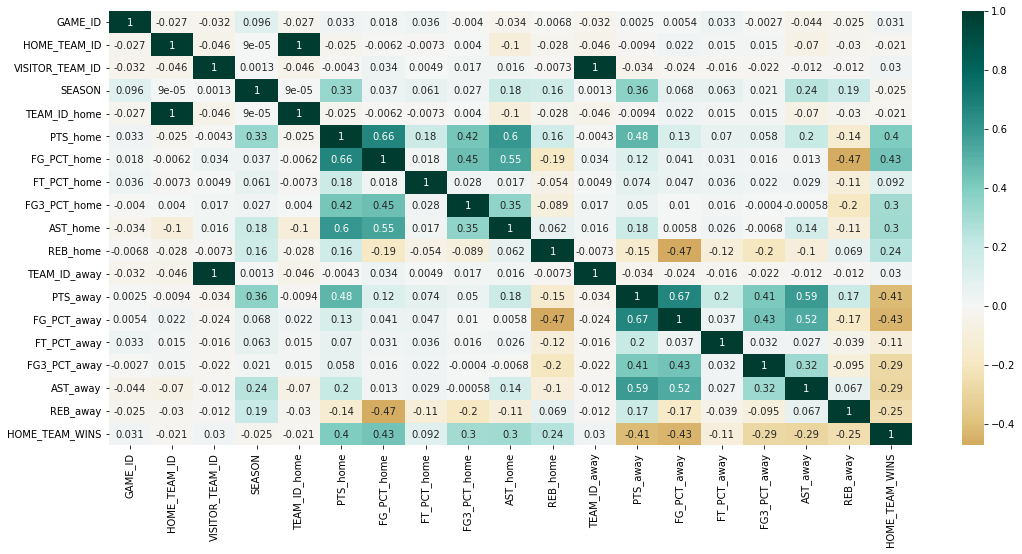

In [26]:
plt.figure(figsize=(18,8))
sns.heatmap(df_corr, annot=True, cmap='BrBG', center=0)

# Model

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [28]:
lr.fit(data, target)

LinearRegression()

In [29]:
lr.predict(data)

array([[0.86538292],
       [0.59694809],
       [0.81832406],
       ...,
       [0.7649905 ],
       [0.4171308 ],
       [0.38265745]])

# Evaluation

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [38]:
def evaluate(estimator, data, target):

    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)
    probs = estimator.predict_proba(X_test)[:,1]

    # plotear curva roc
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    f, ax = plt.subplots(1,1)
    f.set_size_inches(8,7)
    ax.plot(fpr,tpr)
    ax.plot([0,1], [0,1], c='grey')

    print(f'acc: {accuracy_score(y_test, y_hat):.3} \
    recall: {recall_score(y_test, y_hat):.3} \
    precision:{precision_score(y_test, y_hat):.3} \
    f1:{f1_score(y_test, y_hat):.3} \
    auc:{roc_auc_score(y_test, probs):.3}')

acc: 0.81     recall: 0.854     precision:0.83     f1:0.842     auc:0.891


/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


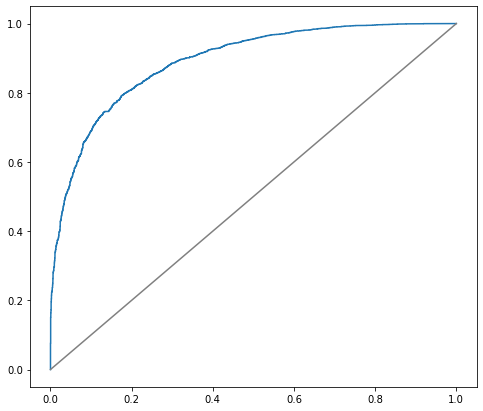

In [39]:
logR = LogisticRegression()
logR.fit(data, target)
evaluate(logR, data, target)